In [1]:
print('ritu')

ritu


In [43]:
import numpy as np 
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [9]:
X = 6 * np.random.rand(200,1) -3
y= 0.8* X**2 + 0.9*X +2 + np.random.randn(200,1)

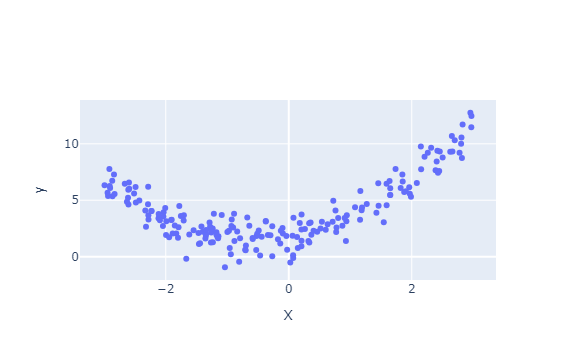

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X.ravel(),y=y.ravel(),mode = 'markers'))
fig.update_layout(
    xaxis_title = 'X',
    yaxis_title = 'y'
)
fig.show()

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_sXize = 0.2,random_state = 2)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
print('R2 Score of lr', r2_score(y_test,predict))

R2 Score of lr 0.2771949904382832


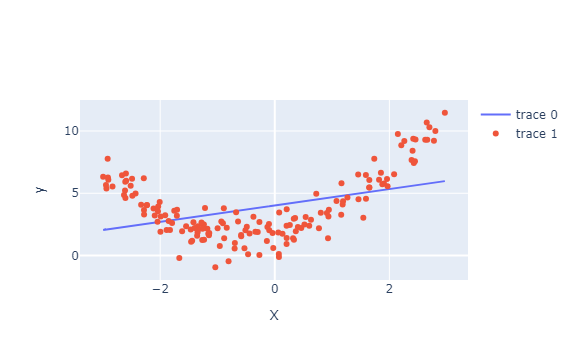

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_train.ravel(),y=lr.predict(X_train).ravel(),mode = 'lines'))
fig.add_trace(go.Scatter(x=X_train.ravel(),y=y_train.ravel(),mode = 'markers'))
fig.update_layout(
    xaxis_title = 'X',
    yaxis_title = 'y',
)

In [28]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape)
print(X_train_poly.shape)
print(X_test.shape)
print(X_test_poly.shape)
print(X_train_poly[0])
print(X_train[0])
print(X_test_poly[0])
print(X_test[0])

(160, 1)
(160, 3)
(40, 1)
(40, 3)
[ 1.         -0.09582663  0.00918274]
[-0.09582663]
[ 1.         -2.8415957   8.07466612]
[-2.8415957]


In [31]:
plr = LinearRegression()
plr.fit(X_train_poly,y_train)
plrPredict = plr.predict(X_test_poly)
print('R2 Score of plr',r2_score(y_test,plrPredict))

R2 Score of plr 0.894131173644322


In [32]:
print('coef = ',plr.coef_,'\nintercept = ',plr.intercept_)

coef =  [[0.         0.8540878  0.82146657]] 
intercept =  [1.81154863]


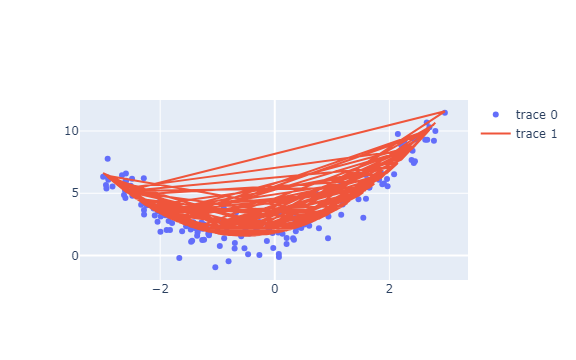

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_train.ravel(),y = y_train.ravel(),mode = 'markers'))
fig.add_trace(go.Scatter(x=X_train.ravel(),y = plr.predict(X_train_poly).ravel(),mode = 'lines'))

In [37]:
plr.predict(X_train_poly)

array([[ 1.73724759],
       [ 2.47310274],
       [ 2.86087371],
       [ 4.5855095 ],
       [ 1.94341742],
       [ 5.1220865 ],
       [ 2.31625004],
       [ 1.59037404],
       [ 1.78989849],
       [ 3.34951456],
       [ 3.99100697],
       [ 6.28907452],
       [ 2.32663061],
       [ 4.85920421],
       [ 6.08709409],
       [ 1.91449354],
       [ 7.94158127],
       [ 1.98946278],
       [ 4.28780708],
       [ 2.01162846],
       [ 3.26846352],
       [ 1.94191278],
       [ 1.70946382],
       [ 1.67299599],
       [ 3.04906954],
       [ 6.26279232],
       [ 1.87614209],
       [ 1.58959824],
       [ 3.62705074],
       [ 3.12616043],
       [ 4.7813164 ],
       [ 3.18209654],
       [ 2.00820253],
       [ 1.64157894],
       [ 1.70156737],
       [ 4.14170495],
       [ 2.95847852],
       [ 4.21612727],
       [ 2.51063221],
       [ 3.31489506],
       [ 1.61518434],
       [ 1.86716763],
       [ 5.45745526],
       [ 5.7720734 ],
       [ 2.04650781],
       [ 5

In [40]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = plr.predict(X_new_poly)

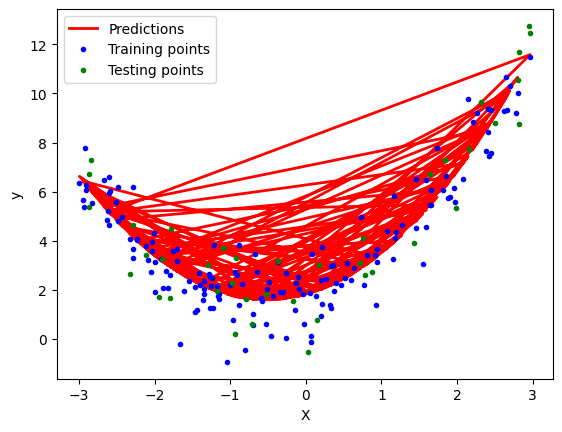

In [42]:
import matplotlib.pyplot as plt
plt.plot(X_train, plr.predict(X_train_poly), "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()